# El clasificador de Comida Mexicana
Pinche aplicación mamona, es de visión de computadora y basada en la arquitectura de redes convulosionales de resnet y la librería de Fastai. Creada para todos aquellos nacos incapaces de indentificar la  diferencia entre un taco y una quesadilla, una enchilada y un burrito, o la combinación de cualquiera de estos (también incluye nachos porque mejor prevenir que lamentar). Para no quedar mal con los compatriotas del Benito Juarez, Chespirito, el AMLO y el mismisimo Chicharito. Solo mete la imagen de la comida en el botoncito y se clasificará con un cierto nivel de confiabilidad, este nivel indica que tan seguro está el algoritmo de su decisión.

In [2]:
#!pip install fastai
#!pip install -Uqq fastbook
import fastbook
#fastbook.setup_book()
from fastai.vision.all import *
from fastai.vision.widgets import *
#!pip install voila

In [2]:
#!pip install voila

In [3]:
from fastai import *
from fastbook import *
from fastai.vision.widgets import *

In [4]:

#!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.4 OK


In [80]:
#key = os.environ.get('AZURE_SEARCH_KEY', '79bf3358dcd44dc9a8b3946d185b483f')
#types = 'Tacos','Burritos','Quesadillas','Enchiladas','Nachos'
#path = Path('Mex')
#if not path.exists():
#    path.mkdir()
#    for o in types:
#        dest = (path/o)
#        dest.mkdir(exist_ok=True)
#        results = search_images_bing(key, f'{o}')
#        download_images(dest, urls=results.attrgot('contentUrl'))

In [85]:
#fns = get_image_files(path)

In [86]:
#failed = verify_images(fns)

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(


In [87]:
#failed.map(Path.unlink);

In [88]:
#tacos = DataBlock(
#    blocks=(ImageBlock, CategoryBlock), 
#    get_items=get_image_files, 
#    splitter=RandomSplitter(valid_pct=0.2, seed=42),
#    get_y=parent_label,
#    item_tfms=Resize(128))'''

In [89]:
#dls = tacos.dataloaders(path)

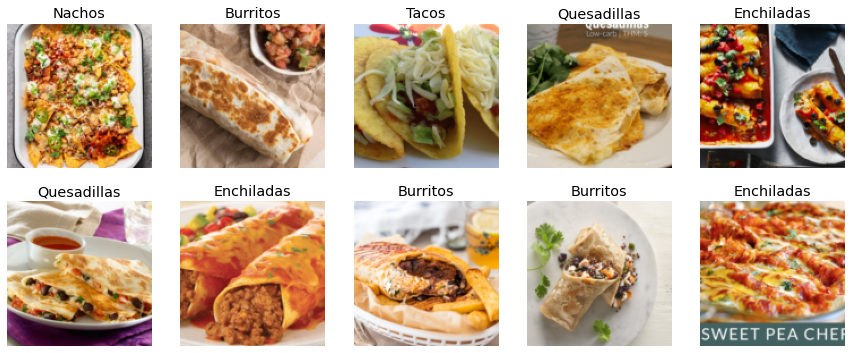

In [90]:


#dls.valid.show_batch(max_n=10, nrows=2)

In [91]:
#tacos = tacos.new(
#    item_tfms=RandomResizedCrop(224, min_scale=0.5),
#    batch_tfms=aug_transforms())
#dls = tacos.dataloaders(path)

#learn = cnn_learner(dls, resnet18, metrics=error_rate)
#learn.fine_tune(12)'''

epoch,train_loss,valid_loss,error_rate,time
0,2.522852,1.229192,0.425676,00:11


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.295490,0.977402,0.277027,00:11
1,1.117342,0.895190,0.243243,00:11
2,0.970551,0.834059,0.222973,00:10
3,0.826270,0.749516,0.216216,00:11
4,0.690560,0.759987,0.162162,00:11
5,0.614325,0.769090,0.155405,00:11
6,0.522739,0.770371,0.155405,00:10
7,0.448292,0.776906,0.155405,00:10
8,0.396479,0.780166,0.162162,00:11
9,0.353295,0.777073,0.162162,00:10


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  warnings.w

In [92]:
#learn.export(os.path.abspath('./my_export.pkl'))

In [3]:
learn_inf = load_learner(os.path.abspath('./my_export.pkl'))

In [4]:
button=widgets.FileUpload()
out=widgets.Output()
prediction=widgets.Label()

In [5]:
def click(change):
  img=PILImage.create(button.data[-1])
  out.clear_output()
  with out:display(img.to_thumb(120,120))
  pred,index,proba=learn_inf.predict(img)
  prediction.value=f'La neta creo son {pred}, y tengo una en esto de confianza de {proba[index]}'

In [6]:
button.observe(click,names=['data'])
display(VBox([widgets.Label('Wey, ingresa una foto del platillo'),button,out,prediction]))